<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Optimization_scripts/blob/main/Pandapower_opt_(LW_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandapower

In [ ]:
import pandapower as pp
import pandas as pd

In [ ]:
#Создаем пустую сеть без элементов
net = pp.create_empty_network()

In [ ]:
#Создаем шины с указанием параметра номинального напряжения для подключения генераторов, энергосистемы и нагрузок
busG1 = pp.create_bus(net, vn_kv = 10.5, type='b')
busG2 = pp.create_bus(net, vn_kv = 10.5, type='b')
busG3 = pp.create_bus(net, vn_kv = 10.5, type='b')
busH6 = pp.create_bus(net, vn_kv = 10.5, type='b')
busH8 = pp.create_bus(net, vn_kv = 10.5, type='b')
busH2 = pp.create_bus(net, vn_kv = 110, type='b')
busH3 = pp.create_bus(net, vn_kv = 110, type='b')
busH1 = pp.create_bus(net, vn_kv = 110, type='b')
busGS = pp.create_bus(net, vn_kv = 110, type='b')
busT1 = pp.create_bus(net, vn_kv = 110, type='b')
busT2 = pp.create_bus(net, vn_kv = 110, type='b')
busT3 = pp.create_bus(net, vn_kv = 110, type='b')

In [ ]:
#Создаем нагрузки с указанием реактивной и активной составляющей мощности
pp.create_load(net, bus=busG1, p_mw=4, q_mvar=4)
pp.create_load(net, bus=busG2, p_mw=2.5, q_mvar=0.5)
pp.create_load(net, bus=busH6, p_mw=2, q_mw=3)
pp.create_load(net, bus=busG3, p_mw=1, q_mw=1.1)
pp.create_load(net, bus=busH8, p_mw=2, q_mw=1.5)
pp.create_load(net, bus=busH3, p_mw=21.5, q_mw=19)
pp.create_load(net, bus=busH2, p_mw=19, q_mw=21)
pp.create_load(net, bus=busH1, p_mw=13, q_mw=11.4)

7

In [ ]:
#OPRA DTG-1.8/2GL
G1 = pp.create_gen(net, bus=busG1, p_mw=2, q_mw = 0.871, min_p_mw=0, min_q_mw = 0, vm_pu=1.0,
                   max_p_mw=2, max_q_mw = 0.871, slack=True)
#ГТУ-4С
G2 = pp.create_gen(net, bus=busG3, p_mw=4, q_mw = 2.107, min_p_mw=0, min_q_mw = 0, vm_pu=1.0,
                   max_p_mw=4, max_q_mw = 2.107, slack=True)
G2 = pp.create_gen(net, bus=busG3, p_mw=4, q_mw = 2.107, min_p_mw=0, min_q_mw = 0, vm_pu=1.0,
                   max_p_mw=4, max_q_mw = 2.107, slack=True)
#G3 UGT 2500C
G3 = pp.create_gen(net, bus=busG3, p_mw=2.75, q_mw = 1.198, min_p_mw=0, min_q_mw = 0, vm_pu=1.0,
                   max_p_mw=2.75, max_q_mw = 1.198, slack=True)
G3 = pp.create_gen(net, bus=busG3, p_mw=2.75, q_mw = 1.198, min_p_mw=0, min_q_mw = 0, vm_pu=1.0,
                   max_p_mw=2.75, max_q_mw = 1.198, slack=True)

In [ ]:
#Создадим трансформаторы с параметрами из найденных каталогов
#Т1 ТДН32000 110/10
transformer1 = pp.create_transformer_from_parameters(net, hv_bus=busT1, lv_bus=busH8,
sn_mva=32, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.5, pfe_kw=160, i0_percent=0.25)
#Т2 ТД40000 110/10
transformer2 = pp.create_transformer_from_parameters(net, hv_bus=busT2, lv_bus=busG2,
sn_mva=40, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.53, pfe_kw=170, i0_percent=0.15)
#Т3 ТД40000 110/10
transformer3 = pp.create_transformer_from_parameters(net, hv_bus=busT3, lv_bus=busG1,
sn_mva=40, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.053, pfe_kw=170, i0_percent=0.15)

In [ ]:
#Создадим ЛЭП с параметрами из каталога
#ЛЭП 110 кВ
L7H1GS = pp.create_line_from_parameters(net, from_bus=busH1, to_bus=busGS, length_km=1, name='L7', r_ohm_per_km=0.306, x_ohm_per_km=0.434, c_nf_per_km=0.035, max_i_ka=0.330, parallel=1)
L4H1H2 = pp.create_line_from_parameters(net, from_bus=busH1, to_bus=busH2, length_km=2.1, name='L4', r_ohm_per_km=0.306, x_ohm_per_km=0.434, c_nf_per_km=0.035, max_i_ka=0.330, parallel=1)
L1GST1 = pp.create_line_from_parameters(net, from_bus=busGS, to_bus=busT1, length_km=6.8, name='L1', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
L2H3T2 = pp.create_line_from_parameters(net, from_bus=busH3, to_bus=busT2, length_km=9.1, name='L2', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
L3GST3 = pp.create_line_from_parameters(net, from_bus=busH3, to_bus=busT3, length_km=8.9, name='L3', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
#ЛЭП 10 кВ
L5H8H7 = pp.create_line_from_parameters(net, from_bus=busH8, to_bus=busG3, length_km=1.3, name='L5', r_ohm_per_km=0.12, x_ohm_per_km=0.369, c_nf_per_km=0, max_i_ka=0.605, parallel=1)
L6H6H5 = pp.create_line_from_parameters(net, from_bus=busH6, to_bus=busG2, length_km=0.7, name='L6', r_ohm_per_km=0.162, x_ohm_per_km=0.377, c_nf_per_km=0, max_i_ka=0.510, parallel=1)

In [ ]:
#Создадим энергосистему
GS = pp.create_ext_grid(net, bus=busGS, vm_pu=1.0, name=None)

In [ ]:
#Создадим имитацию межсекционных выключателей
S1H2H3 = pp.create.create_switch(net, bus = busH2, element = busH3, et='b', closed=False)
S2H4H5 = pp.create.create_switch(net, bus = busG1, element = busG2, et='b', closed=False)
S3H7H6 = pp.create.create_switch(net, bus = busG3, element = busH6, et='b', closed=False)

In [ ]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (12 elements)
   - load (8 elements)
   - gen (5 elements)
   - switch (3 elements)
   - ext_grid (1 element)
   - line (7 elements)
   - trafo (3 elements)


In [ ]:
#Расчет режима
pp.runpp(net)

<BarContainer object of 12 artists>

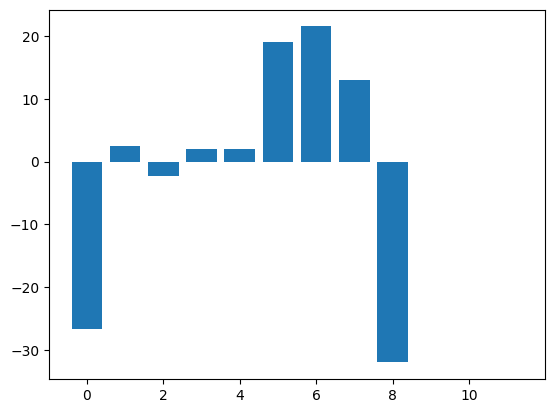

In [ ]:
#Построим график падений напряжений на шинах
import matplotlib.pyplot as plt
import numpy as np
x = net.res_bus.p_mw.index
y = net.res_bus.p_mw
plt.bar(x,y)

In [ ]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-32.019242,-2.701216e-02,32.045211,6.371182e-02,0.025970,0.036700,0.168194,0.168194,0.168194,0.999188,-0.065816,1.000000,0.000000,50.967901
1,19.019242,2.701216e-02,-19.000000,-1.068548e-12,0.019242,0.027012,0.099906,0.099906,0.099906,0.999188,-0.065816,0.998176,-0.148031,30.274654
2,-0.059782,-5.591993e+00,0.067303,5.598915e+00,0.007521,0.006922,0.029352,0.029347,0.029352,1.000000,0.000000,1.001410,-0.076097,11.076237
3,4.695650,5.680419e-01,-4.688960,-5.623650e-01,0.006691,0.005677,0.023929,0.023930,0.023930,1.037460,-4.073068,1.035821,-4.146908,9.030128
4,-26.195650,-5.680419e-01,26.396452,7.751026e-01,0.200802,0.207061,0.132558,0.132558,0.132558,1.037460,-4.073068,1.045619,-3.630648,50.021969
5,-2.235595,-5.701463e+00,2.291857,5.874469e+00,0.056262,0.173005,0.346724,0.346724,0.346724,0.971199,-0.097916,1.000000,0.000000,57.309781
6,-2.000000,1.216804e-13,2.004262,9.917966e-03,0.004262,0.009918,0.111926,0.111926,0.111926,0.982537,-5.071372,0.984643,-4.787849,21.946275


In [ ]:
#Создаем пустую сеть без элементов
net1 = pp.create_empty_network()

In [ ]:
#Создаем шины с указанием параметра номинального напряжения для подключения генераторов, энергосистемы и нагрузок
busG1 = pp.create_bus(net1, vn_kv = 10.5, type='b')
busG2 = pp.create_bus(net1, vn_kv = 10.5, type='b')
busG3 = pp.create_bus(net1, vn_kv = 10.5, type='b')
busH6 = pp.create_bus(net1, vn_kv = 10.5, type='b')
busH8 = pp.create_bus(net1, vn_kv = 10.5, type='b')
busH2 = pp.create_bus(net1, vn_kv = 110, type='b')
busH3 = pp.create_bus(net1, vn_kv = 110, type='b')
busH1 = pp.create_bus(net1, vn_kv = 110, type='b')
busGS = pp.create_bus(net1, vn_kv = 110, type='b')
busT1 = pp.create_bus(net1, vn_kv = 110, type='b')
busT2 = pp.create_bus(net1, vn_kv = 110, type='b')
busT3 = pp.create_bus(net1, vn_kv = 110, type='b')

In [ ]:
#Создаем нагрузки с указанием реактивной и активной составляющей мощности
pp.create_load(net1, bus=busG1, p_mw=4, q_mvar=4)
pp.create_load(net1, bus=busG2, p_mw=2.5, q_mvar=0.5)
pp.create_load(net1, bus=busH6, p_mw=2, q_mw=3)
pp.create_load(net1, bus=busG3, p_mw=1, q_mw=1.1)
pp.create_load(net1, bus=busH8, p_mw=2, q_mw=1.5)
pp.create_load(net1, bus=busH3, p_mw=21.5, q_mw=19)
pp.create_load(net1, bus=busH2, p_mw=19, q_mw=21)
pp.create_load(net1, bus=busH1, p_mw=13, q_mw=11.4)

7

In [ ]:
#Создадим трансформаторы с параметрами из найденных каталогов
#Т1 ТДН32000 110/10
transformer1 = pp.create_transformer_from_parameters(net1, hv_bus=busT1, lv_bus=busH8,
sn_mva=32, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.5, pfe_kw=160, i0_percent=0.25)
#Т2 ТД40000 110/10
transformer2 = pp.create_transformer_from_parameters(net1, hv_bus=busT2, lv_bus=busG2,
sn_mva=40, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.53, pfe_kw=170, i0_percent=0.15)
#Т3 ТД40000 110/10
transformer3 = pp.create_transformer_from_parameters(net1, hv_bus=busT3, lv_bus=busG1,
sn_mva=40, vn_hv_kv=110, vn_lv_kv=10, vk_percent=10.5, vkr_percent=0.053, pfe_kw=170, i0_percent=0.15)

In [ ]:
#Создадим ЛЭП с параметрами из каталога
#ЛЭП 110 кВ
L7H1GS = pp.create_line_from_parameters(net1, from_bus=busH1, to_bus=busGS, length_km=1, name='L7', r_ohm_per_km=0.306, x_ohm_per_km=0.434, c_nf_per_km=0.035, max_i_ka=0.330, parallel=1)
L4H1H2 = pp.create_line_from_parameters(net1, from_bus=busH1, to_bus=busH2, length_km=2.1, name='L4', r_ohm_per_km=0.306, x_ohm_per_km=0.434, c_nf_per_km=0.035, max_i_ka=0.330, parallel=1)
L1GST1 = pp.create_line_from_parameters(net1, from_bus=busGS, to_bus=busT1, length_km=6.8, name='L1', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
L2H3T2 = pp.create_line_from_parameters(net1, from_bus=busH3, to_bus=busT2, length_km=9.1, name='L2', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
L3GST3 = pp.create_line_from_parameters(net1, from_bus=busH3, to_bus=busT3, length_km=8.9, name='L3', r_ohm_per_km=0.428, x_ohm_per_km=0.444, c_nf_per_km=0.034, max_i_ka=0.265, parallel=1)
#ЛЭП 10 кВ
L5H8H7 = pp.create_line_from_parameters(net1, from_bus=busH8, to_bus=busG3, length_km=1.3, name='L5', r_ohm_per_km=0.12, x_ohm_per_km=0.369, c_nf_per_km=0, max_i_ka=0.605, parallel=1)
L6H6H5 = pp.create_line_from_parameters(net1, from_bus=busH6, to_bus=busG2, length_km=0.7, name='L6', r_ohm_per_km=0.162, x_ohm_per_km=0.377, c_nf_per_km=0, max_i_ka=0.510, parallel=1)

In [ ]:
#Создадим энергосистему
GS = pp.create_ext_grid(net1, bus=busGS, vm_pu=1.0, name=None)

In [ ]:
#Создадим имитацию межсекционных выключателей
S1H2H3 = pp.create.create_switch(net1, bus = busH2, element = busH3, et='b', closed=True)
S2H4H5 = pp.create.create_switch(net1, bus = busG1, element = busG2, et='b', closed=True)
S3H7H6 = pp.create.create_switch(net1, bus = busG3, element = busH6, et='b', closed=True)

In [ ]:
#Расчет режима
pp.runpp(net1)

In [ ]:
net1.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-61.691313,-4.017479,61.788299,4.154901,0.096986,0.137422,0.325037,0.325037,0.325037,0.998291,-0.121166,1.000000,0.000000,98.496030
1,48.691313,4.017479,-48.564112,-3.837347,0.127201,0.180132,0.256871,0.256871,0.256871,0.998291,-0.121166,0.995403,-0.320331,77.839622
2,3.959299,0.855035,-3.955352,-0.851819,0.003947,0.003216,0.021260,0.021261,0.021261,1.000000,0.000000,0.998835,-0.044867,8.023004
3,4.058471,1.829323,-4.052032,-1.823806,0.006439,0.005516,0.023473,0.023476,0.023476,0.995403,-0.320331,0.993477,-0.364722,8.858783
4,4.005641,2.008025,-3.999261,-2.002544,0.006380,0.005481,0.023627,0.023629,0.023629,0.995403,-0.320331,0.993478,-0.359487,8.916699
5,1.793797,0.800071,-1.787724,-0.781398,0.006073,0.018673,0.113910,0.113910,0.113910,0.948109,-0.769161,0.941786,-1.197337,18.828141
6,-1.212276,0.781398,1.214688,-0.775784,0.002412,0.005614,0.084207,0.084207,0.084207,0.941786,-1.197337,0.941133,-0.957804,16.511231


<BarContainer object of 12 artists>

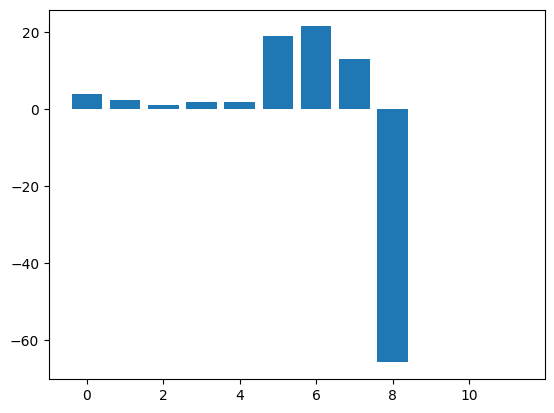

In [ ]:
#Построим график падений напряжений на шинах системы
import matplotlib.pyplot as plt
import numpy as np
x = net1.res_bus.p_mw.index
y = net1.res_bus.p_mw
plt.bar(x,y)

In [ ]:
import pandas as np

In [ ]:
#Таблица падений напряжений на шинах в разных режимах
vmpu1 = [1.000000, 0.984643, 1.000000, 0.982537, 0.971199, 0.998176, 1.037460, 0.999188, 1.000000, 1.001410, 1.035821, 1.045619]
vmpu2 = [0.941133, 0.941133, 0.941786, 0.941786, 0.948109, 0.995403, 0.995403, 0.998291, 0.998291, 0.998835, 0.993477, 0.993478]
dframe1 = np.DataFrame(list(zip(vmpu1, vmpu2)), columns=['Падение напряжение на шинах с генераторами', 'Падение напряжения на шинах без генераторов'])
dframe1

,Падение напряжение на шинах с генераторами,Падение напряжения на шинах без генераторов
0,1.000000,0.941133
1,0.984643,0.941133
2,1.000000,0.941786
3,0.982537,0.941786
4,0.971199,0.948109
5,0.998176,0.995403
6,1.037460,0.995403
7,0.999188,0.998291
8,1.000000,0.998291
9,1.001410,0.998835


In [ ]:
#Расчет потерь в линиях в разных конфигурациях системы
pll1 = [0.025970, 0.019242, 0.007521, 0.006691, 0.200802, 0.056262, 0.004262]
qll1 = [0.036700, 0.027012, 0.006922, 0.005677, 0.207061, 0.173005, 0.009918]
dframe2 = np.DataFrame(list(zip(pll1, qll1)), columns=[ 'Потери активной мощности в линиях с генераторами', 'Потери реактивной мощности в линиях с генераторами'])
dframe2

,Потери активной мощности в линиях с генераторами,Потери реактивной мощности в линиях с генераторами
0,0.025970,0.036700
1,0.019242,0.027012
2,0.007521,0.006922
3,0.006691,0.005677
4,0.200802,0.207061
5,0.056262,0.173005
6,0.004262,0.009918


In [ ]:
#Потери мощности в линиях
plt1 = [0.168292, 0.184698, 0.194967]
qlt1 = [0.102548, 0.052447, 1.686159]
dframe3 = np.DataFrame(list(zip(plt1, qlt1)), columns=['Потери активной мощности в трансформаторах с генераторами', 'Потери реактивной мощности в трансформаторах с генераторами'])
dframe3

,Потери активной мощности в трансформаторах с генераторами,Потери реактивной мощности в трансформаторах с генераторами
0,0.168292,0.102548
1,0.184698,0.052447
2,0.194967,1.686159


In [ ]:
#Потери мощности в линиях без генераторов
pll2 = [0.096986, 0.127201, 0.003947, 0.006439, 0.006380, 0.006073, 0.002412]
qll2 = [0.137422, 0.180132, 0.003216, 0.005516, 0.005481, 0.018673, 0.005614]
dframe4 = np.DataFrame(list(zip(pll2, qll2)), columns=['Потери активной мощности в линиях без генераторов', 'Потери реактивной мощности в линиях без генераторов',])
dframe4

,Потери активной мощности в линиях без генераторов,Потери реактивной мощности в линиях без генераторов
0,0.096986,0.137422
1,0.127201,0.180132
2,0.003947,0.003216
3,0.006439,0.005516
4,0.006380,0.005481
5,0.006073,0.018673
6,0.002412,0.005614


In [ ]:
#Потери мощности в трансфоматорах без генераторов
plt2 = [0.161556, 0.169453, 0.167153]
qlt2 = [0.051748, 0.050679, 0.051455]
dframe5 = np.DataFrame(list(zip(plt2, qlt2)), columns=['Потери активной мощности в трансформаторах без генераторов', 'Потери реактивной мощности в трансформаторах без генераторов'])
dframe5

,Потери активной мощности в трансформаторах без генераторов,Потери реактивной мощности в трансформаторах без генераторов
0,0.161556,0.051748
1,0.169453,0.050679
2,0.167153,0.051455


In [ ]:
#Найдем суммарные потери в системе
Psum1 = net.res_line.pl_mw.sum() + net.res_trafo.pl_mw.sum()
Qsum1 = net.res_line.ql_mvar.sum() + net.res_trafo.ql_mvar.sum()
print('PLsum, kW =', Psum1, 'QLsum, kVar =', Qsum1, ' - Потери активной и реактивной мощности в системе с РГ')
Psum2 = net1.res_line.pl_mw.sum() + net1.res_trafo.pl_mw.sum()
Qsum2 = net1.res_line.ql_mvar.sum() + net1.res_trafo.ql_mvar.sum()
print('PLsum, kW =', Psum2, 'QLsum, kVar =', Qsum2, ' - Потери активной и реактивной мощности в системе без генерации')

PLsum, kW = 0.8687057548285037 QLsum, kVar = 2.3074492215959572  - Потери активной и реактивной мощности в системе с РГ
PLsum, kW = 0.7475978439893922 QLsum, kVar = 0.50993616908533  - Потери активной и реактивной мощности в системе без генерации


Вывод: В результате проделанной работы были использовании библиотеки pandapower для построения электроэнергетической системы. С помощью библиотеки были построены шины, секционные выключатели, линии ЛЭП, трансформаторы и генераторы. Расчитаны режимы работы для двух вариантов, с распределенной генерацией и без генерации. Составлены таблицы сравнений показателей потерь мощности в системе и расчитано суммарные потери мощнсти в системе. В системе с генераторами потери реактивной мощности больше, чем в системе без генераторов, а потери активной мощности для обеих систем не сильно отличаются, но все равно ниже в системе без генераторов.